In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

df = pd.read_csv("house_prices.csv")

# Quick overview
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187531 entries, 0 to 187530
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Index              187531 non-null  int64  
 1   Title              187531 non-null  object 
 2   Description        184508 non-null  object 
 3   Amount(in rupees)  187531 non-null  object 
 4   Price (in rupees)  169866 non-null  float64
 5   location           187531 non-null  object 
 6   Carpet Area        106858 non-null  object 
 7   Status             186916 non-null  object 
 8   Floor              180454 non-null  object 
 9   Transaction        187448 non-null  object 
 10  Furnishing         184634 non-null  object 
 11  facing             117298 non-null  object 
 12  overlooking        106095 non-null  object 
 13  Society            77853 non-null   object 
 14  Bathroom           186703 non-null  object 
 15  Balcony            138596 non-null  object 
 16  Ca

In [5]:
def extract_sqft(value):
    """
    Safely extract square footage from text.
    Returns float or NaN.
    """
    if pd.isna(value):
        return np.nan

    value = str(value).lower()

    # Find all numbers in the string
    numbers = re.findall(r"[\d,.]+", value)

    if not numbers:
        return np.nan

    try:
        # Convert first number to float
        return float(numbers[0].replace(",", ""))
    except ValueError:
        return np.nan

In [6]:
df["area_sqft"] = df["Description"].apply(extract_sqft)

In [7]:
important_cols = ["area_sqft", "Price (in rupees)"]

threshold = 0.4 * len(df)  # 40% missing allowed

cols_to_drop = [
    col for col in df.columns
    if df[col].isnull().sum() > threshold and col not in important_cols
]

df = df.drop(columns=cols_to_drop)

In [8]:
# Numerical columns
num_cols = df.select_dtypes(include=["int", "float"]).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

In [9]:
# Categorical columns
cat_cols = df.select_dtypes(include=["object", "category"]).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [10]:
for col in df.select_dtypes(include=["object"]).columns:
    if df[col].nunique() / len(df[col]) < 0.5:
        df[col] = df[col].astype("category")

In [11]:
df = df.dropna(subset=["Price (in rupees)"])

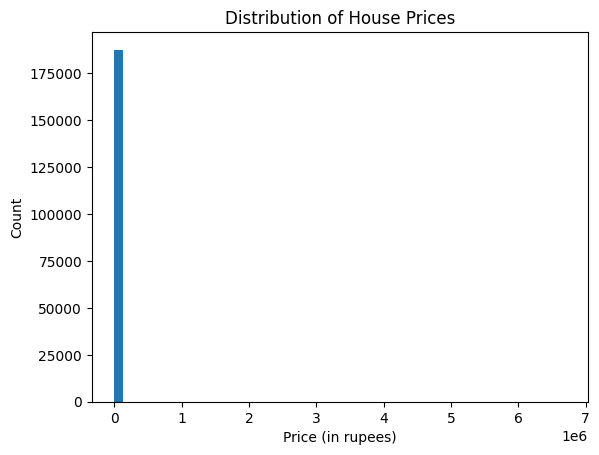

In [12]:
plt.hist(df["Price (in rupees)"], bins=50)
plt.xlabel("Price (in rupees)")
plt.ylabel("Count")
plt.title("Distribution of House Prices")
plt.show()

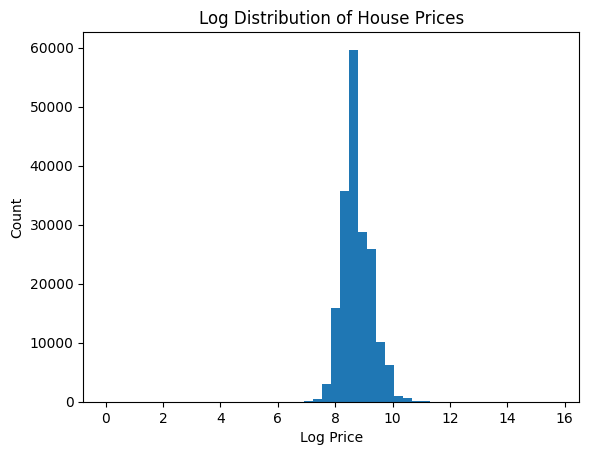

In [13]:
plt.hist(np.log1p(df["Price (in rupees)"]), bins=50)
plt.xlabel("Log Price")
plt.ylabel("Count")
plt.title("Log Distribution of House Prices")
plt.show()

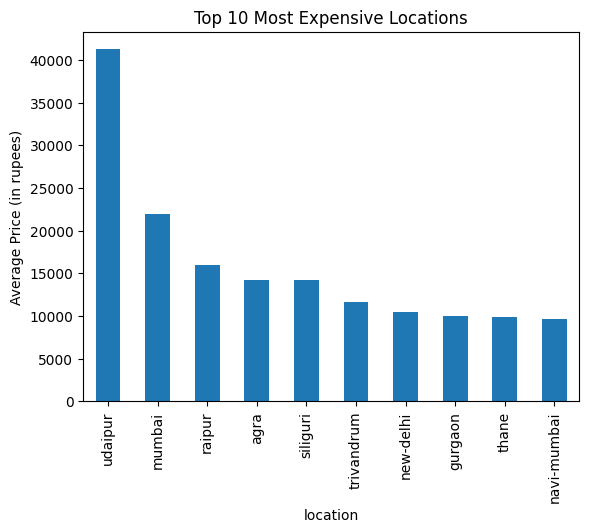

In [16]:
top_locations = (
    df.groupby("location", observed=True)["Price (in rupees)"]
      .mean()
      .sort_values(ascending=False)
      .head(10)
)

top_locations.plot(kind="bar")
plt.ylabel("Average Price (in rupees)")
plt.title("Top 10 Most Expensive Locations")
plt.show()

In [17]:
numeric_cols = df.select_dtypes(include=["int", "float"]).columns

correlation_with_price = (
    df[numeric_cols]
    .corr()["Price (in rupees)"]
    .sort_values(ascending=False)
)

correlation_with_price

Price (in rupees)    1.000000
area_sqft            0.000551
Index               -0.007818
Name: Price (in rupees), dtype: float64